<a href="https://colab.research.google.com/github/Steel3264/AI/blob/main/AI_W7_17_03_23.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd 
url = 'mtcars.csv'
data = pd.read_csv(url)
data.head()

,Unnamed: 0,mpg,disp,hp,wt
0,Mazda RX4,21.0,160.0,110,2.620
1,Mazda RX4 Wag,21.0,160.0,110,2.875
2,Datsun 710,22.8,108.0,93,2.320
3,Hornet 4 Drive,21.4,258.0,110,3.215
4,Hornet Sportabout,18.7,360.0,175,3.440


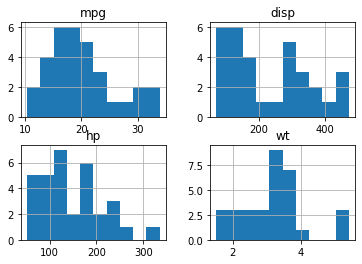

In [5]:
import matplotlib.pyplot as plt 
data.hist()   # khổ phân bố dữ liệu 
plt.show()

In [6]:
correlation = data.corr()
print(correlation)

           mpg      disp        hp        wt
mpg   1.000000 -0.847551 -0.776168 -0.867659
disp -0.847551  1.000000  0.790949  0.887980
hp   -0.776168  0.790949  1.000000  0.658748
wt   -0.867659  0.887980  0.658748  1.000000


<Axes: >

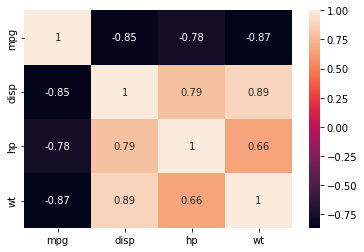

In [7]:
import seaborn as sns 
sns.heatmap(correlation, annot=True ) #màu càng đậm giá trị càng thấp 

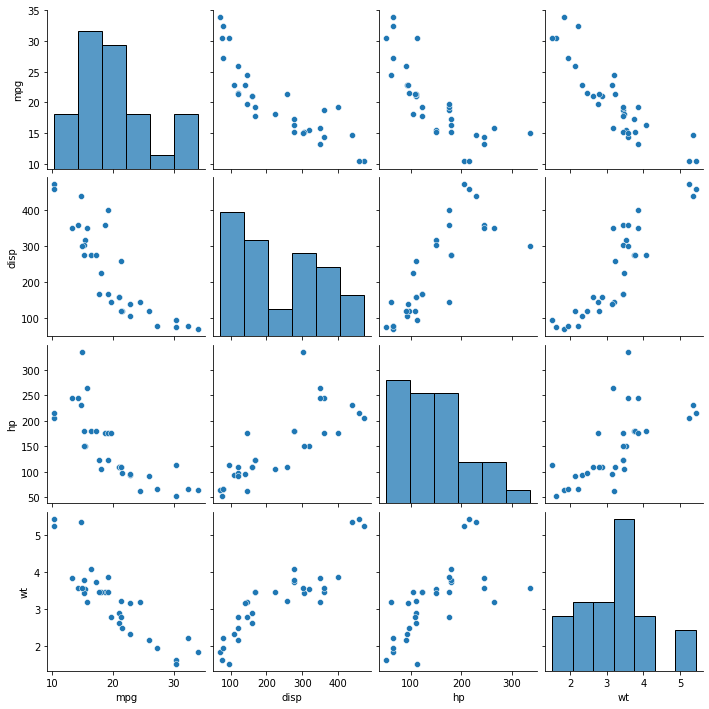

In [8]:
sns.pairplot(data) 

In [19]:
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(X=pd.DataFrame(data['wt']), 
          y=data['mpg'])
print('Hệ số intercept là: ', model.intercept_)
print('Hệ số coeffient là: ', model.coef_)

#pt hồi quy 
 # (mpg = -5,344wt+37,285)
 #độ chính xác 
model.score(X=pd.DataFrame(data['wt']), y=data['mpg'])
y_pred = model.predict(X = pd.DataFrame(data['wt']))
print(y_pred)
y_pred = model.predict(X = pd.DataFrame(data['wt']))
print(y_pred)




Hệ số intercept là:  37.28512616734204
Hệ số coeffient là:  [-5.34447157]
[23.28261065 21.9197704  24.88595212 20.10265006 18.90014396 18.79325453
 18.20536265 20.23626185 20.45004071 18.90014396 18.90014396 15.53312687
 17.3502472  17.08302362  9.22665041  8.29671236  8.71892561 25.52728871
 28.65380458 27.47802083 24.11100374 18.47258623 18.92686632 16.76235533
 16.73563297 26.94357367 25.847957   29.19894068 20.34315128 22.48093991
 18.20536265 22.4274952 ]
[23.28261065 21.9197704  24.88595212 20.10265006 18.90014396 18.79325453
 18.20536265 20.23626185 20.45004071 18.90014396 18.90014396 15.53312687
 17.3502472  17.08302362  9.22665041  8.29671236  8.71892561 25.52728871
 28.65380458 27.47802083 24.11100374 18.47258623 18.92686632 16.76235533
 16.73563297 26.94357367 25.847957   29.19894068 20.34315128 22.48093991
 18.20536265 22.4274952 ]


In [23]:
#Bac 2
model = linear_model.LinearRegression()
x = pd.DataFrame([data['wt'], data['wt']**2]).T
y=data['mpg']
model.fit(X,y=data['mpg'])
print('Intecept của mô hình: ', model.intercept_)
print('Coeffient của mô hình: ', model.coef_)
print('Độ chính xác của mô hình: ', model.score(x,y))

#pt hồi quy là: 
# (-13.38wt + 1.17wt^2 + 49.93)

Intecept của mô hình:  49.93081094945181
Coeffient của mô hình:  [-13.38033708   1.17108689]
Độ chính xác của mô hình:  0.8190613581384094


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


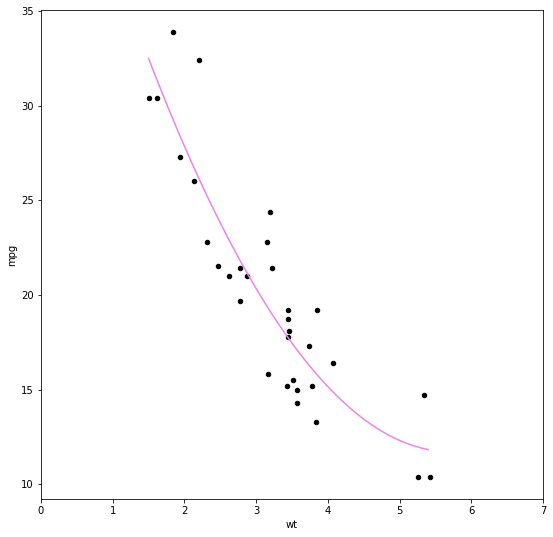

In [43]:
import numpy as np
range = np.arange(1.5, 5.5, 0.1)
x_range=pd.DataFrame([range,range**2]).T 
y_pred = model.predict(X=x_range)
data.plot(kind = 'scatter', x='wt', 
          y = 'mpg', figsize = (9,9), color = 'black',
          xlim = (0,7))
plt.plot(range, y_pred, color = 'violet')


In [44]:
#Bac 10
model = linear_model.LinearRegression()
X = pd.DataFrame([data['wt'], data['wt']**1, data['wt']**2,  data['wt']**3,  data['wt']**4,  data['wt']**5,  data['wt']**6, data['wt']**7, data['wt']**8, data['wt']**9, data['wt']**10]).T
y=data['mpg']

model.fit(X,y=data['mpg'])
print('Intecept của mô hình: ', model.intercept_)
print('Coeffient của mô hình: ', model.coef_)
print('Độ chính xác của mô hình: ', model.score(X,y))

#pt hồi quy là: 
# (-9.58wt + 0.11wt^2 + 46.19)


Intecept của mô hình:  -14921.120810791104
Coeffient của mô hình:  [ 3.22906711e+04  3.22906848e+04 -1.20086131e+05  1.26931928e+05
 -8.46598456e+04  3.73155199e+04 -1.10334755e+04  2.16590405e+03
 -2.70730545e+02  1.94974162e+01 -6.15515437e-01]
Độ chính xác của mô hình:  0.8702106606279609


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


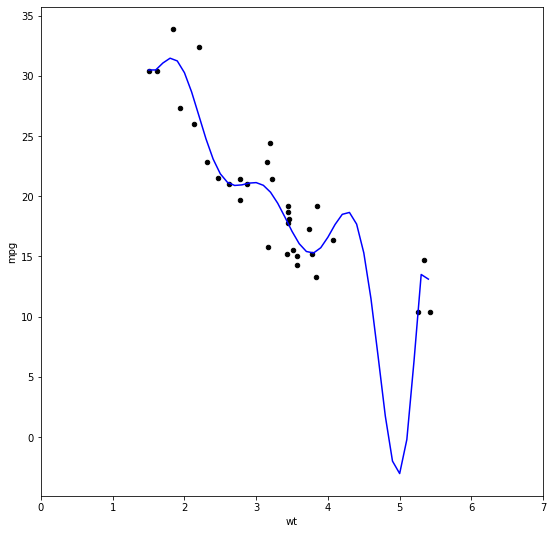

In [46]:
import numpy as np
range = np.arange(1.5, 5.5, 0.1)
X_range=pd.DataFrame([range,range**1,range**2,range**3,range**4,range**5,range**6,range**7,range**8,range**9,range**10]).T 
y_pred = model.predict(X=X_range)
data.plot(kind = 'scatter', x='wt', 
          y = 'mpg', figsize = (9,9), color = 'black',
          xlim = (0,7))
plt.plot(range, y_pred, color = 'blue')